                                       Exploratory Data Analysis (EDA)

This is the first step of our machine learning project.

The goal of this notebook is to:
- Understand the dataset
- See what data is available
- Understand what each column represents
- Explore the dataset broadly, including columns that may later be discarded
- Observe potential patterns related to arrests
- Identify a reasonable machine learning problem to explore further

In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.show()


# we are loading dataset
df = pd.read_csv("../data/city_of_chicago_crimes_2001_to_present.csv")
df.shape

(6747040, 22)

Each row in the dataset represents one crime incident.
The columns describe the crime type, time, location, and whether an arrest was made and others .

In [ ]:
# see the first rows (i think the first five)
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10000092,HY189866,03/18/2015 07:44:00 PM,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,...,28.0,25.0,04B,1144606.0,1903566.0,2015,02/10/2018 03:50:01 PM,41.891399,-87.744385,"(41.891398861, -87.744384567)"
1,10000094,HY190059,03/18/2015 11:00:00 PM,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,...,15.0,67.0,26,1166468.0,1860715.0,2015,02/10/2018 03:50:01 PM,41.773372,-87.665319,"(41.773371528, -87.665319468)"
2,10000095,HY190052,03/18/2015 10:45:00 PM,044XX S LAKE PARK AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,4.0,39.0,08B,1185075.0,1875622.0,2015,02/10/2018 03:50:01 PM,41.813861,-87.596643,"(41.81386068, -87.596642837)"
3,10000096,HY190054,03/18/2015 10:30:00 PM,051XX S MICHIGAN AVE,0460,BATTERY,SIMPLE,APARTMENT,False,False,...,3.0,40.0,08B,1178033.0,1870804.0,2015,02/10/2018 03:50:01 PM,41.800802,-87.622619,"(41.800802415, -87.622619343)"
4,10000097,HY189976,03/18/2015 09:00:00 PM,047XX W ADAMS ST,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,False,False,...,28.0,25.0,03,1144920.0,1898709.0,2015,02/10/2018 03:50:01 PM,41.878065,-87.743354,"(41.878064761, -87.743354013)"


In [ ]:
# see the columns (features the X )
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [ ]:
# the types of columns (float , int , etc...)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6747040 entries, 0 to 6747039
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

Some columns contain missing values.
This is normal because this is real world data collected over many years from chicago (2001-2018).

In [ ]:
# this checks how many null values in each column
df.isna().sum()

ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      4096
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614854
Community Area          616029
FBI Code                     0
X Coordinate             60401
Y Coordinate             60401
Year                         0
Updated On                   0
Latitude                 60401
Longitude                60401
Location                 60401
dtype: int64

First, we must understand what each column represents because not all columns will be useful for prediction, but all of them must be understood so we can decide which features to choose later on.

***Column Overview (Column and it's meaning)***

*ID => Unique identifier  
*Case Number => Police case reference  
*Date => Date and time of the crime  
*Block => Street block where the crime happened  
*IUCR => Crime classification code  
*Primary Type => Main crime category (Theft, Battery, etc.)  
*Description => Detailed crime description  
*Location Description => Type of place (street, apartment, store, etc.)  
*Arrest => Arrest outcome (True / False)  

*Domestic => Indicates if the crime is domestic-related (True / False)  
*Beat => Police patrol area where the crime occurred  
*District => Police district responsible for the area  
*Ward => Political ward of the city  
*Community Area => Neighborhood or community where the crime occurred  
*FBI Code => FBI crime classification code  

*X Coordinate => X map coordinate of the crime location  
*Y Coordinate => Y map coordinate of the crime location  
*Year => Year when the crime occurred  
*Updated On => Date when the record was last updated  
*Latitude => Geographic latitude of the crime location  
*Longitude => Geographic longitude of the crime location  
*Location => Latitude and longitude combined as a string

The column `Arrest` indicates whether a crime resulted in an arrest.
Understanding its distribution is a necessary first step.

In [ ]:
# count the value of (true/false arrests) 
df['Arrest'].value_counts()

Arrest
False    4875610
True     1871430
Name: count, dtype: int64

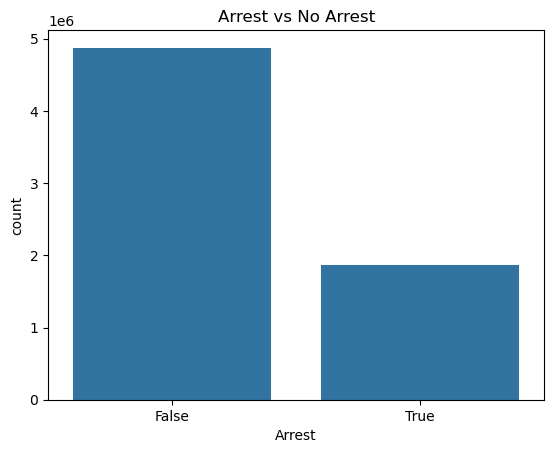

In [8]:
sns.countplot(x='Arrest', data=df)
plt.title("Arrest vs No Arrest")
plt.show()


From this visualization we can conclude that most crimes don't result in an arrest.
This may or may not be framed as classification problem as this will be revisted later.

In the following steps we will explore different parts of the dataset . This is not to choose the final features for our model but to understand how the data behaves.

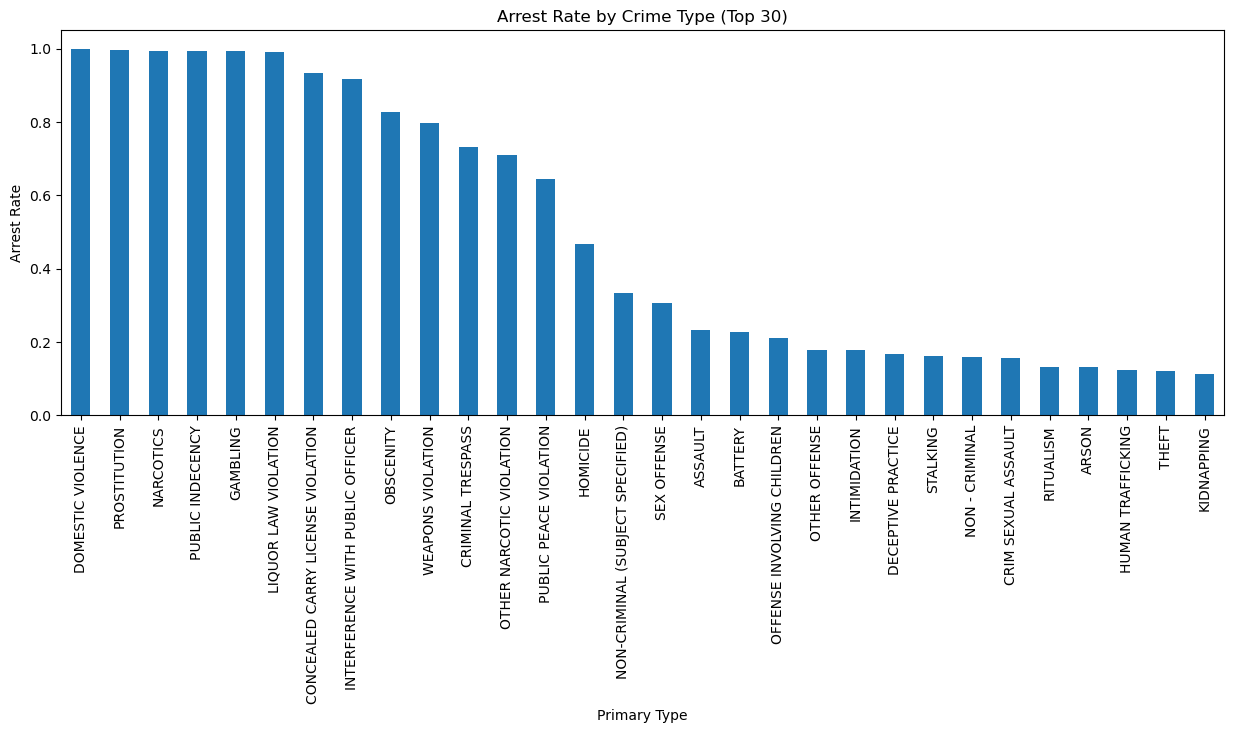

In [ ]:
# `groupby`: Group arrests rate by type
# `mean()`: compute the average arrest rate for each type,
# `sort_values(ascending=False)`: sort them from highest to lowest
# `head(30)`: choose the top 30
# `plot(kind='bar', figsize=(15,5))`: as a bar chart
df.groupby('Primary Type')['Arrest'].mean().sort_values(ascending=False).head(30).plot(
    kind='bar', figsize=(15,5)
)
plt.title("Arrest Rate by Crime Type (Top 30)")
plt.ylabel("Arrest Rate")
plt.show()


As the visualization showed , we can conclude that different `Primary Type` results in different arrests outcomes.

=> This may help us later on in our model.

In [ ]:
# show top 10 rows of 'IUCR', 'Primary Type', 'FBI Code'
df[['IUCR', 'Primary Type', 'FBI Code']].head(10)

,IUCR,Primary Type,FBI Code
0,041A,BATTERY,04B
1,4625,OTHER OFFENSE,26
2,0486,BATTERY,08B
3,0460,BATTERY,08B
4,031A,ROBBERY,03
5,0460,BATTERY,08B
6,0486,BATTERY,08B
7,0486,BATTERY,08B
8,1811,NARCOTICS,18
9,0460,BATTERY,08B


Crime information appears to be encoded in multiple ways.
Some columns may represent similar information at different levels of detail.
This redundancy will be examined later.

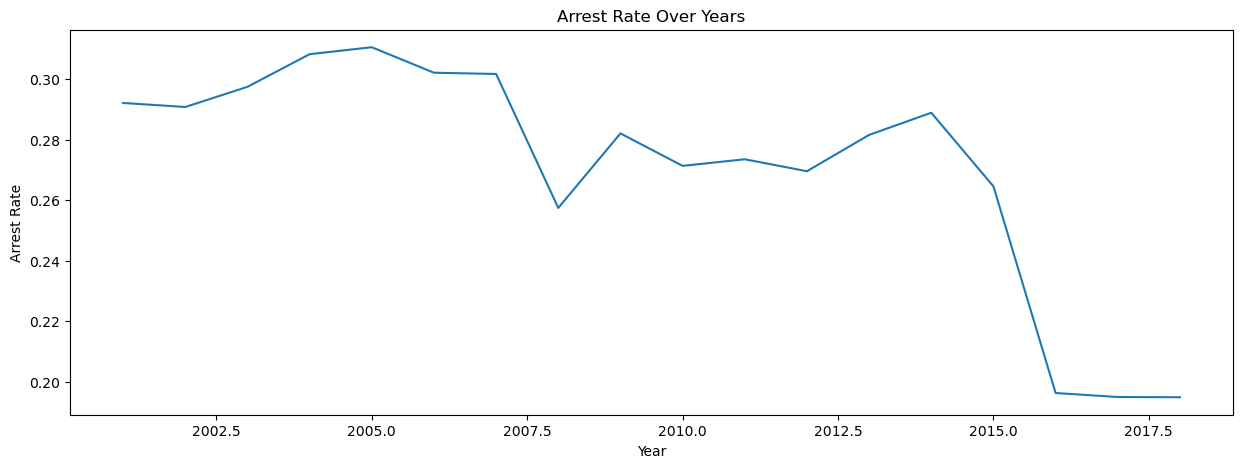

In [22]:
# this visualization is about arrests rate grouped by year  
df.groupby('Year')['Arrest'].mean().plot(figsize=(15,5))
plt.title("Arrest Rate Over Years")
plt.ylabel("Arrest Rate")
plt.show()


Arrest rates change over long time periods.
This may reflect policy, reporting, or enforcement changes rather than crime context.
This observation will be considered later.


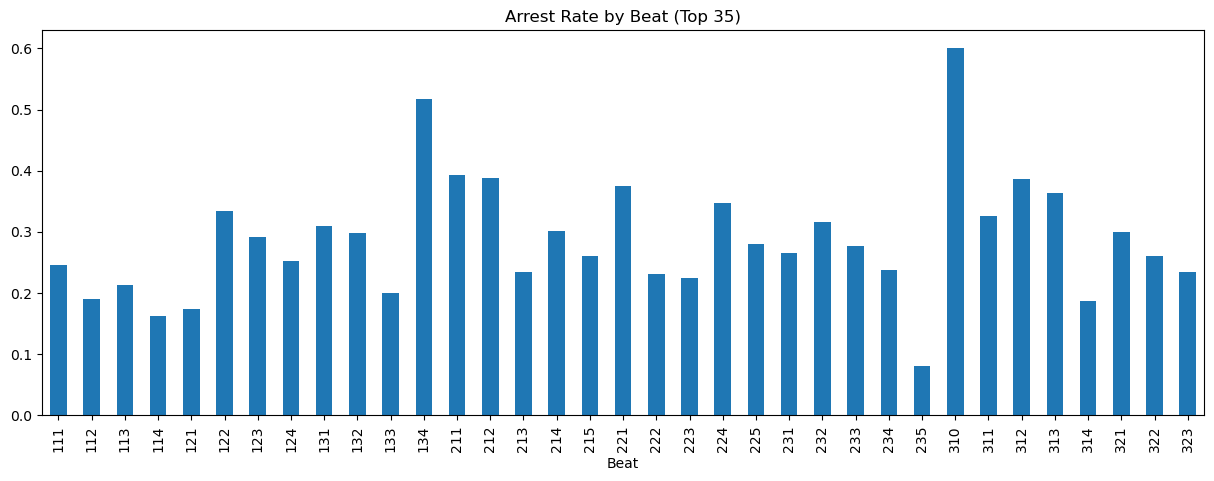

In [42]:
# group by arrest rate by beat (area or route an officer patrols during their shift like rond point)
df.groupby('Beat')['Arrest'].mean().head(35).plot(kind='bar', figsize=(15,5))
plt.title("Arrest Rate by Beat (Top 35)")
plt.show()

`Beat` data shows variation but appears very detailed.
This raises questions about sparsity and usefulness.

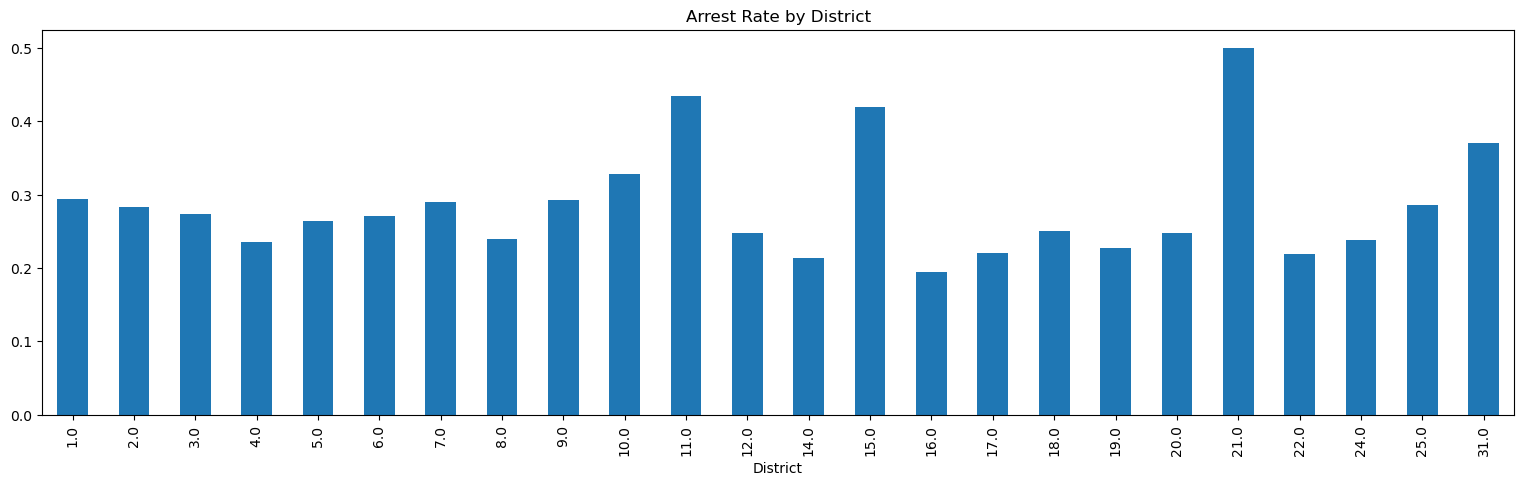

In [ ]:
#group by district
df.groupby('District')['Arrest'].mean().plot(kind='bar', figsize=(19,5))
plt.title("Arrest Rate by District")
plt.show()

##to modify later on###
`District` aggregation shows clearer structure than beats.
Different levels of spatial aggregation may behave differently.


In [ ]:
sns.scatterplot(
    x='Longitude',
    y='Latitude',
    hue='Arrest',
    data=df,
    alpha=0.4
)
plt.title("Crime Locations by Arrest Outcome")
plt.show()


Based on this exploratory analysis, we observe that arrest outcomes seem to vary with:
- Crime characteristics
- Time
- Location

These observations suggest that modeling arrest outcomes could be possible,
but this hypothesis will need to be tested.